In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
import os
import PIL
import glob

In [3]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [4]:
path="C:/Users/srini/Desktop/water"
os.listdir(path)

['test', 'train', 'valid']

In [5]:
len(os.listdir(path))

3

In [12]:
train_dir ="C:/Users/srini/Desktop/water/train"
test_dir = "C:/Users/srini/Desktop/water/test"
valid_dir = "C:/Users/srini/Desktop/water/valid"

In [13]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1020 files belonging to 3 classes.
Using 816 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory( 
valid_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 557 files belonging to 3 classes.
Using 111 files for validation.


In [16]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 731 files belonging to 3 classes.
Using 585 files for training.


In [17]:
class_names = train_ds.class_names
print(class_names)

['high', 'low', 'medium']


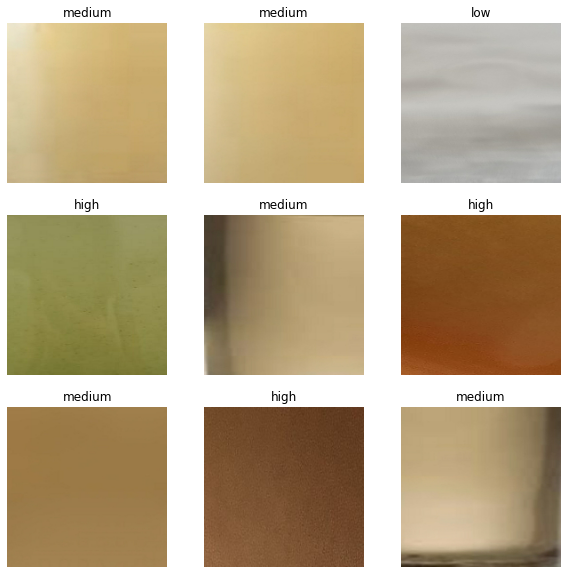

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [22]:
normalization_layer = layers.Rescaling(1./255)

In [23]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.15735295 0.7957762


In [24]:
num_classes = len(class_names)

In [25]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= 'accuracy')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [28]:
epochs = 15

In [29]:
history = model.fit(train_ds,
                   epochs= epochs
                   )

Epoch 1/15
26/26 [==============================] - 23s 822ms/step - loss: 0.6645 - accuracy: 0.7292
Epoch 2/15
26/26 [==============================] - 21s 795ms/step - loss: 0.2691 - accuracy: 0.8995
Epoch 3/15
26/26 [==============================] - 20s 760ms/step - loss: 0.2091 - accuracy: 0.9228
Epoch 4/15
26/26 [==============================] - 21s 809ms/step - loss: 0.2211 - accuracy: 0.9191
Epoch 5/15
26/26 [==============================] - 18s 687ms/step - loss: 0.2257 - accuracy: 0.9179
Epoch 6/15
26/26 [==============================] - 17s 647ms/step - loss: 0.1725 - accuracy: 0.9314
Epoch 7/15
26/26 [==============================] - 18s 684ms/step - loss: 0.1431 - accuracy: 0.9534
Epoch 8/15
26/26 [==============================] - 19s 730ms/step - loss: 0.1604 - accuracy: 0.9375
Epoch 9/15
26/26 [==============================] - 19s 742ms/step - loss: 0.1519 - accuracy: 0.9424
Epoch 10/15
26/26 [==============================] - 18s 692ms/step - loss: 0.1148 - accura

In [30]:
evaluation = model.evaluate(test_ds)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_ds)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

19/19 [==============================] - 5s 226ms/step - loss: 0.7897 - accuracy: 0.8205
Test Accuracy: 82.05%
26/26 [==============================] - 5s 191ms/step - loss: 0.0437 - accuracy: 0.9841
Train Accuracy: 98.41%


In [31]:
layers = model.layers
print(f"The model has {len(layers)} layers")

The model has 12 layers


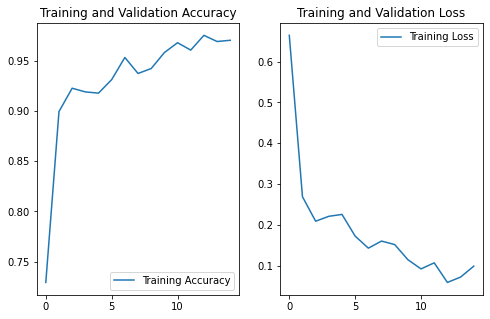

In [32]:
acc = history.history['accuracy']


loss = history.history['loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [34]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.YlGnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=64,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predicted_classes= np.argmax(predictions, axis=1)

report = classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

Found 731 images belonging to 3 classes.


C:\Users\srini\AppData\Local\Temp/ipykernel_21712/3986903100.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


              precision    recall  f1-score   support

        high       0.98      0.82      0.89       244
         low       0.77      1.00      0.87       256
      medium       0.82      0.69      0.75       231

    accuracy                           0.84       731
   macro avg       0.85      0.83      0.84       731
weighted avg       0.85      0.84      0.84       731



In [36]:
import itertools    

cm = confusion_matrix(y_true=true_classes, y_pred=predicted_classes)

Confusion matrix, without normalization
[[199   9  36]
 [  0 256   0]
 [  5  67 159]]


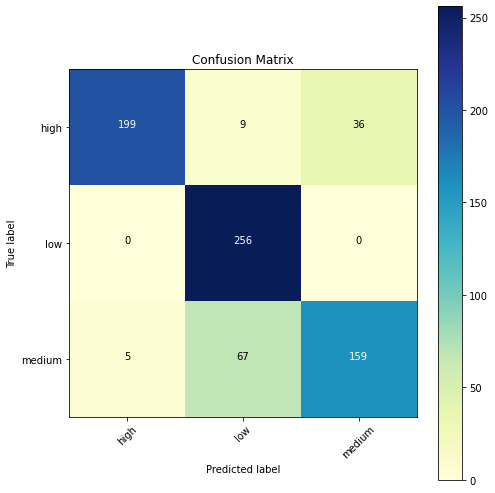

In [37]:
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cm=cm, classes=class_labels, title='Confusion Matrix')

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [39]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 180, 180, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'rescaling_1_input'}},
  {'class_name': 'Rescaling',
   'config': {'name': 'rescaling_1',
    'trainable': True,
    'batch_input_shape': (None, 180, 180, 3),
    'dtype': 'float32',
    'scale': 0.00392156862745098,
    'offset': 0.0}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regular

In [40]:
model.save_weights('model.h5')

In [52]:
#dictionary to label all traffic signs class.
classes = { 1:'LOW',
            2:'MEDIUM', 
            3: 'HIGH'
          }

In [53]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [55]:
top=tk.Tk()
top.geometry('800x600')
top.title('water quality identify')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((180,180))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])[0]
    sign = classes[(np.argmax(pred,axis=-1))+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="WATER TURBIDITY LEVEL ",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()



MEDIUM
MEDIUM
MEDIUM
